# Using Pandas and Python to Explore Your Dataset

### Config

In [1]:
download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

### Download the data

In [2]:
import requests

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


In [2]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [5]:
nba = pd.read_csv(target_csv_path)
type(nba)

pandas.core.frame.DataFrame

In [6]:
len(nba)

126314

In [8]:
nba.shape

(126314, 23)

In [9]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [10]:
pd.set_option("display.max.columns", None)

In [11]:
pd.set_option("display.precision", 2)

In [12]:
nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


## Getting to Know Your Data

In [13]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [14]:
# show basic statistics
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


In [15]:
import numpy as np

In [16]:
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,200012260SAS,NBA,4/13/2011,BOS,Lakers,BOS,Lakers,H,L,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


In [19]:
nba["team_id"].value_counts()
# LAL => LA Lakers appeared 5078 times

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
TRH      60
INJ      60
PIT      60
DTF      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [20]:
nba["fran_id"].value_counts()
# Lakers appeared 6024 times

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

In [27]:
nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts()
# can see the Lakers used to be MNL (Minneapolis Lakers)

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [28]:
# Check the dates that the lakers played in Minneapolis
nba.loc[nba["team_id"] == "MNL", "date_game"].min()

'1/1/1949'

In [29]:
nba.loc[nba["team_id"] == "MNL", "date_game"].max()

'4/9/1959'

In [30]:
nba.loc[nba["team_id"] == "MNL", "date_game"].agg(("min", "max"))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

## Getting to Know Pandas’ Data Structures

In [31]:
revenues = pd.Series([5555, 7000, 1980])
revenues

0    5555
1    7000
2    1980
dtype: int64

In [32]:
revenues.values

array([5555, 7000, 1980])

In [33]:
revenues.index

RangeIndex(start=0, stop=3, step=1)

In [35]:
city_revenues = pd.Series(
    [4200, 8000, 6500],
    index=["Amsterdam", "Toronto", "Tokyo"]
)
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [36]:
# construct a Series with a label index from a Python dictionary
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

In [37]:
city_employee_count.keys()

Index(['Amsterdam', 'Tokyo'], dtype='object')

In [38]:
"Tokyo" in city_employee_count

True

In [39]:
"New York" in city_employee_count

False

In [41]:
# combine the data series
city_data = pd.DataFrame({
    "revenue": city_revenues,
    "employee_count": city_employee_count
})
city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [42]:
city_data.index

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [43]:
city_data.values

array([[4.2e+03, 5.0e+00],
       [6.5e+03, 8.0e+00],
       [8.0e+03,     nan]])

In [44]:
city_data.axes

[Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
 Index(['revenue', 'employee_count'], dtype='object')]

In [45]:
# 0 axis is the row index
city_data.axes[0]

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [50]:
# 0 axis is the colum index
city_data.axes[1]

Index(['revenue', 'employee_count'], dtype='object')

In [51]:
city_data.keys()

Index(['revenue', 'employee_count'], dtype='object')

In [52]:
"Amsterdam" in city_data

False

In [53]:
"revenue" in city_data

True

## Accessing Series Elements

In [54]:
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [58]:
# can access data with either label or index
print(city_revenues["Toronto"])
print(city_revenues[1])

8000
8000


In [59]:
# can also use negative indices and slices
print(city_revenues[-1])
print(city_revenues[1:])
print(city_revenues["Toronto":])

6500
Toronto    8000
Tokyo      6500
dtype: int64
Toronto    8000
Tokyo      6500
dtype: int64


### Using .loc and .iloc

In [61]:
colors = pd.Series(
    ["red", "purple", "blue", "green", "yellow"],
    index=[1, 2, 3, 5, 8]
)
colors

1       red
2    purple
3      blue
5     green
8    yellow
dtype: object

In [62]:
# works on positional index
colors.loc[1]

'red'

In [64]:
# works on label index
colors.iloc[1]

'purple'

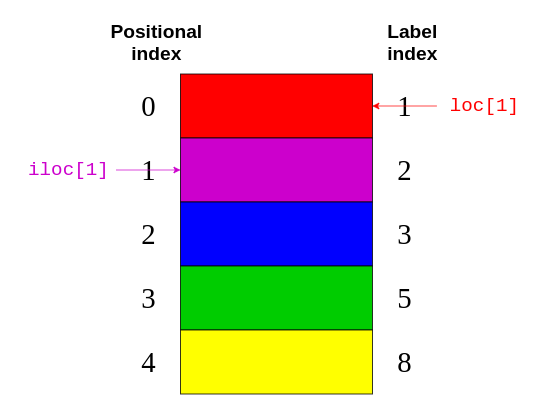

In [66]:
# Return the elements with the implicit index: 1, 2
colors.iloc[1:3]

2    purple
3      blue
dtype: object

In [67]:
# Return the elements with the explicit index between 3 and 8
colors.loc[3:8]

3      blue
5     green
8    yellow
dtype: object

## Accessing DataFrame Elements

In [68]:
city_data["revenue"]

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [69]:
type(city_data["revenue"])

pandas.core.series.Series

In [70]:
city_data.revenue

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [71]:
city_data.loc["Amsterdam": "Tokyo", "revenue"]

Amsterdam    4200
Tokyo        6500
Name: revenue, dtype: int64

## Querying Your Dataset

In [72]:
# where year is geater than 2010
current_decade = nba[nba["year_id"] > 2010]
current_decade.shape

(12658, 23)

In [73]:
# where notes is not empty
games_with_notes = nba[nba["notes"].notnull()]
games_with_notes.shape

(5424, 23)

In [74]:
# where string ends with "ers"
ers = nba[nba["fran_id"].str.endswith("ers")]
ers.shape

(27797, 23)

In [75]:
# combine queries
nba[
    (nba["_iscopy"] == 0) &
    (nba["pts"] > 100) &
    (nba["opp_pts"] > 100) &
    (nba["team_id"] == "BLB")
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA


## Grouping and Aggregating Your Data

In [78]:
points = nba["pts"]

In [79]:
type(points)

pandas.core.series.Series

In [83]:
print("sum",points.sum())
print("max",points.max())
print("min",points.min())
print("mean",points.mean())

sum 12976235
max 186
min 0
mean 102.72998242475101


In [85]:
# group by Franchise and sum their points
nba.groupby("fran_id", sort=False)["pts"].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [87]:
# group by multiple columns
nba[
    (nba["fran_id"] == "Spurs") &
    (nba["year_id"] > 2010)
].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

## Manipulating Columns

In [88]:
df = nba.copy()
df.shape

(126314, 23)

In [89]:
# add column
df["difference"] = df.pts - df.opp_pts
df.shape

(126314, 24)

In [90]:
# create new df with renamed columns
renamed_df = df.rename(
    columns={"game_result": "result", "game_location": "location"}
)
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gameorder    126314 non-null  int64  
 1   game_id      126314 non-null  object 
 2   lg_id        126314 non-null  object 
 3   _iscopy      126314 non-null  int64  
 4   year_id      126314 non-null  int64  
 5   date_game    126314 non-null  object 
 6   seasongame   126314 non-null  int64  
 7   is_playoffs  126314 non-null  int64  
 8   team_id      126314 non-null  object 
 9   fran_id      126314 non-null  object 
 10  pts          126314 non-null  int64  
 11  elo_i        126314 non-null  float64
 12  elo_n        126314 non-null  float64
 13  win_equiv    126314 non-null  float64
 14  opp_id       126314 non-null  object 
 15  opp_fran     126314 non-null  object 
 16  opp_pts      126314 non-null  int64  
 17  opp_elo_i    126314 non-null  float64
 18  opp_elo_n    126314 non-

In [92]:
# removing columns from origional df
print(df.shape)
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
df.drop(elo_columns, inplace=True, axis=1)
print(df.shape)

(126314, 24)
(126314, 20)


## Specifying Data Types

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  win_equiv      126314 non-null  float64
 12  opp_id         126314 non-null  object 
 13  opp_fran       126314 non-null  object 
 14  opp_pts        126314 non-null  int64  
 15  game_location  126314 non-null  object 
 16  game_result    126314 non-null  object 
 17  forecast       126314 non-nul

In [94]:
# convert to date
df["date_game"] = pd.to_datetime(df["date_game"])

In [95]:
df["game_location"].nunique()

3

In [96]:
df["game_location"].value_counts()

H    63138
A    63138
N       38
Name: game_location, dtype: int64

In [98]:
# can see that game location only has 3 values
print(df["game_location"].nunique())
print(df["game_location"].value_counts())

3
H    63138
A    63138
N       38
Name: game_location, dtype: int64


In [99]:
# covert to categorical data
df["game_location"] = pd.Categorical(df["game_location"])
df["game_location"].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

## Cleaning Data

### Missing Values

In [101]:
# drop rows that have an Null value
rows_without_missing_data = nba.dropna()
rows_without_missing_data.shape

(5424, 23)

In [102]:
# drop certain columns
data_without_missing_columns = nba.dropna(axis=1)
data_without_missing_columns.shape

(126314, 22)

In [103]:
# input default value for Null values
data_with_default_notes = nba.copy()
data_with_default_notes["notes"].fillna(
    value="no notes at all",
    inplace=True
)
data_with_default_notes["notes"].describe()

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

### Invalid Values

In [105]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


In [106]:
# seems strabge to have a min pts value of 0, so lets look at it
nba[nba["pts"] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,1460.34,1457.45,40.41,VIR,Squires,2,1484.19,1487.08,A,L,0.33,at Richmond VA; forfeit to VIR


### Inconsistent Values

In [107]:
nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != 'W')].empty

True

In [108]:
nba[(nba["pts"] < nba["opp_pts"]) & (nba["game_result"] != 'L')].empty

True

## Combining Multiple Datasets

In [113]:
further_city_data = pd.DataFrame(
    {"revenue": [7000, 3400], "employee_count":[2, 2]},
    index=["New York", "Barcelona"]
)
further_city_data

,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [112]:
city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [111]:
# concat to append rows
all_city_data = pd.concat([city_data, further_city_data], sort=False)
all_city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


In [115]:
# concat to append colums by giving index
city_countries = pd.DataFrame({
    "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
    "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)
cities

,revenue,employee_count,country,capital
Amsterdam,4200.0,5.0,Holland,1.0
Tokyo,6500.0,8.0,Japan,1.0
Toronto,8000.0,NaN,Canada,0.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0


In [117]:
# concat using join parameter
pd.concat([all_city_data, city_countries], axis=1, join="inner")

,revenue,employee_count,country,capital
Amsterdam,4200,5.0,Holland,1
Tokyo,6500,8.0,Japan,1
Toronto,8000,NaN,Canada,0
Barcelona,3400,2.0,Spain,0


In [118]:
# using merge
countries = pd.DataFrame({
    "population_millions": [17, 127, 37],
    "continent": ["Europe", "Asia", "North America"]
}, index= ["Holland", "Japan", "Canada"])

pd.merge(
    cities, 
    countries, 
    left_on="country", 
    right_index=True
)

# left_on => what column to join on

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17,Europe
Rotterdam,NaN,NaN,Holland,0.0,17,Europe
Tokyo,6500.0,8.0,Japan,1.0,127,Asia
Toronto,8000.0,NaN,Canada,0.0,37,North America


In [119]:
pd.merge(
    cities,
    countries,
    left_on="country",
    right_index=True,
    how="left"
)

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17.0,Europe
Tokyo,6500.0,8.0,Japan,1.0,127.0,Asia
Toronto,8000.0,NaN,Canada,0.0,37.0,North America
New York,7000.0,2.0,NaN,NaN,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0,NaN,NaN
Rotterdam,NaN,NaN,Holland,0.0,17.0,Europe


## Visualizing Your Pandas DataFrame

In [121]:
# show plots in notebook
%matplotlib inline

In [1]:
nba

NameError: name 'nba' is not defined

<AxesSubplot:xlabel='year_id'>

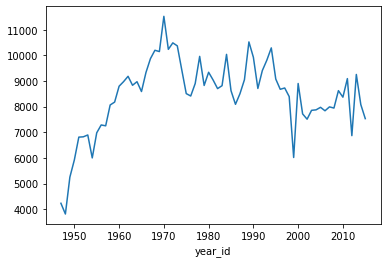

In [122]:
# how many points the Knicks scored throughout the seasons
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

<AxesSubplot:>

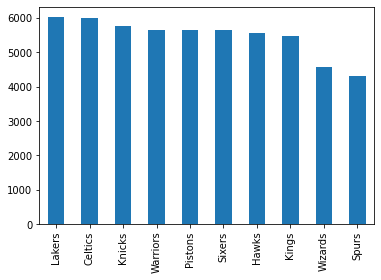

In [123]:
# franchises with the most games played
nba["fran_id"].value_counts().head(10).plot(kind="bar")